In [9]:
#Levitation height distribution extraction analysis
#Last updated 17 April 2021.
#Author: Shreya Deshmukh, Stanford University.

#Runs as a jupyter notebook through anaconda (on python version 2.7)

#Import the following libraries
import os
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.covariance import OAS
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import scipy
from scipy import stats
from scipy.stats import ranksums

plt.rc('font',family='Arial')

#Define file path
#path = 'C:\\Users\\yourefiledirectories' #input the file path to where statistical metrics of height distributions are stored

#os.listdir(path)

In [10]:
#Load PBS (low medium density protocol) data, statistical metrics of all samples' height distributions
df = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4b_highdens.csv', sep=',', header=0, names =
               ['labels','Mean','Variance','Skewness','Kurtosis'])
    
X_pre = df.iloc[:,1:5].copy() #features
y = df.iloc[:,0].copy() #labels, where 0 refers to malaria-negative and 1 refers to malaria-positive

sc = StandardScaler()
#X = sc.fit_transform(X_pre)
X = X_pre.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0) #split into training (70%) and test (30%) sets

#Train Linear Discriminant Analysis (LDA) on training data
LDA = LinearDiscriminantAnalysis(n_components=1, store_covariance=True, tol = 10**(-4), solver = 'svd') # projection in 1D space
data_proj = LDA.fit_transform(X_train,y_train)

scale = LDA.scalings_

print scale

[[-1.83152216e-03]
 [-7.16489017e-06]
 [ 5.40766431e-07]
 [ 1.32285483e-08]]


In [12]:
#Fit LDA scoring to the training set
Xarr =  X_train 
yarr = y_train 

#Loop through features and produce LDA scores
scores0 = np.zeros((Xarr.shape[0],2))
for i in range(Xarr.shape[0]):
    m = Xarr[i,0]
    v = Xarr[i,1]
    s = Xarr[i,2]
    k = Xarr[i,3]
    scores0[i,0] = scale[0]*m + scale[1]*v + scale[2]*s + scale[3]*k

scores0[:,1]=yarr

In [13]:
#Fit LDA scoring to the testset
Xarr =  X_test 
yarr = y_test

#Loop through features and produce LDA scores
scores1 = np.zeros((Xarr.shape[0],2))
for i in range(Xarr.shape[0]):
    m = Xarr[i,0]
    v = Xarr[i,1]
    s = Xarr[i,2]
    k = Xarr[i,3]
    scores1[i,0] = scale[0]*m + scale[1]*v + scale[2]*s + scale[3]*k

scores1[:,1]=yarr

In [14]:
#Sort from negative to positive labels
scores0sort = scores0[scores0[:,1].argsort()] 
scores1sort = scores1[scores1[:,1].argsort()] 

In [15]:
print scores0sort.shape[0], np.sum(scores0sort[:,1])

19 9.0


In [16]:
print scores1sort.shape[0], np.sum(scores1sort[:,1])

9 6.0


In [17]:
#Save variables into a csv file
yourfilename = str('LDAscorestrain_highdens')
np.savetxt('{}\{}.csv'.format(path,yourfilename), scores0sort, delimiter = ",") 

#Save variables into a csv file
yourfilename2 = str('LDAscoresttest_highdens')
np.savetxt('{}\{}.csv'.format(path,yourfilename2), scores1sort, delimiter = ",") 

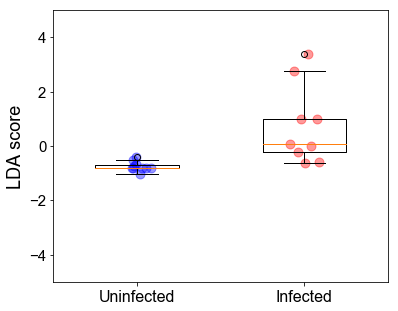

p-value, low dens: 0.004774764425659793
Rank-sum test, low density: -3.347635981803677 0.0008150399118268963


In [18]:
#Plot & stats analysis of LDA scores
#Train, high density
n = 0

#Load data
dataPBS = scores0sort #np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\{}.csv'.format(yourfilename), delimiter=',', encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:10,n])
data_iPBS = dataPBS[10:19,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,10))
PBS[0,0:10]=data_uPBS
PBS[1,0:9]=data_iPBS
PBS[ PBS==0 ] = np.nan


#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(6,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-5,5])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=80, color=c)
plt.show()


    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=True)
print 'p-value, low dens:', prob 

#Wilcoxon's rank-sum test
s,p = ranksums(data_uPBS, data_iPBS)
print "Rank-sum test, low density:", s,p


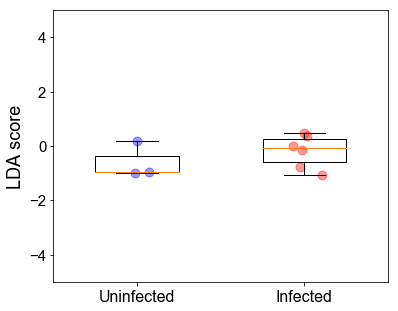

p-value, low dens: 0.4148039394467471
Rank-sum test, low density: -0.7745966692414834 0.4385780260809998


In [19]:
#Plot & stats analysis of LDA scores
#Test, high density
n = 0

#Load data
dataPBS = scores1sort #np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\{}.csv'.format(yourfilename), delimiter=',', encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:3,n])
data_iPBS = dataPBS[3:9,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,6))
PBS[0,0:3]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan


#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(6,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-5,5])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=80, color=c)
plt.show()


    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=True)
print 'p-value, low dens:', prob 

#Wilcoxon's rank-sum test
s,p = ranksums(data_uPBS, data_iPBS)
print "Rank-sum test, low density:", s,p


In [20]:
print scale

[[-1.83152216e-03]
 [-7.16489017e-06]
 [ 5.40766431e-07]
 [ 1.32285483e-08]]
